#### 0.0: Library setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/jgoodz8/3251_Project_Group2/master/AutoInsurance.csv')
df['Binary Response']= np.where(df['Response']=="Yes",1,0)

In [3]:
df.transpose().iloc[:,0:5]

,0,1,2,3,4
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268
State,Washington,Arizona,Nevada,California,Washington
Customer Lifetime Value,2763.52,6979.54,12887.4,7645.86,2813.69
Response,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,3/2/2011
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed
Gender,F,F,F,M,M
Income,56274,0,48767,0,43836


## **Goal**:   
Using Logistic regression, Predict the response received through the marketing campaign.  
- ['Response'] = Yes/No

Using the following variables
1. ['Renew Offer Type']
2. ['Sales Channel']
3. ['Gender']
4. ['State']
5. ['Income']
6. ['Monthly Premium Auto']

#### Assumptions:
- Variables were picked based on intuition (i.e assuming that Monthly Premiums are more likely to influence renewal as opposed to the gender variable.

# 1. Preprocessing for Logistic regression

In [4]:
regressors= ['Renew Offer Type','Sales Channel','Gender','State','Income','Monthly Premium Auto']
df_log= df[regressors]
df_log.transpose().iloc[:,0:5]

,0,1,2,3,4
Renew Offer Type,Offer1,Offer3,Offer1,Offer1,Offer1
Sales Channel,Agent,Agent,Agent,Call Center,Agent
Gender,F,F,F,M,M
State,Washington,Arizona,Nevada,California,Washington
Income,56274,0,48767,0,43836
Monthly Premium Auto,69,94,108,106,73


### 1.1 Numeric Variables

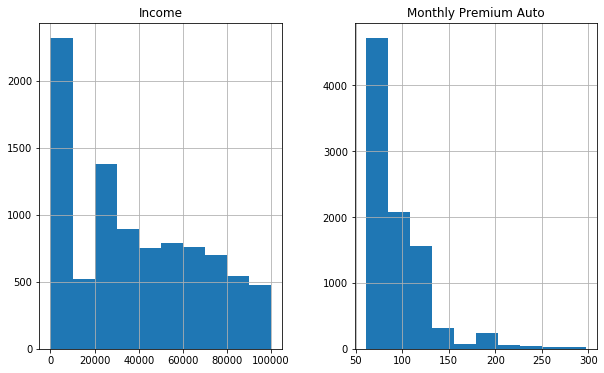

In [5]:
# Plot the histograms of the individual columns
numeric= ['Income','Monthly Premium Auto']
df_log[numeric].hist(figsize=(10,6))
plt.show()

### 1.2 Categorical Variables

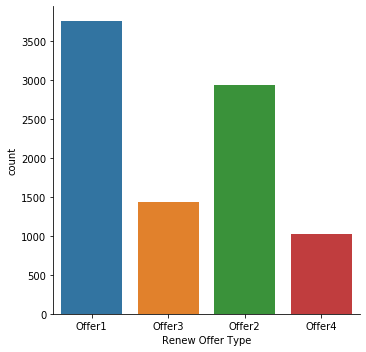

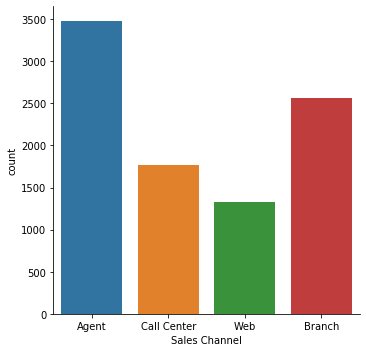

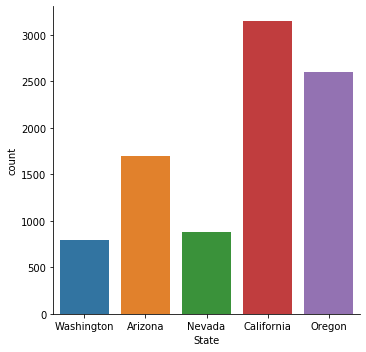

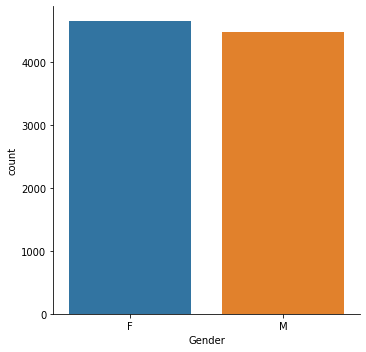

In [6]:
categoric= ['Renew Offer Type','Sales Channel','Gender','State']
sns.catplot('Renew Offer Type',kind="count",data=df_log)
sns.catplot('Sales Channel',kind="count",data=df_log)
sns.catplot('State',kind="count",data=df_log)
sns.catplot('Gender',kind="count",data=df_log)
plt.show()

In [7]:
## Convert Categorical variables into binary variables in order for the logistic model to utilize them
df_categoric= pd.get_dummies(df_log[categoric])
df_numeric= df_log[numeric]

df_processed= df_numeric.join(df_categoric)
df_processed.transpose().iloc[:,0:5]

,0,1,2,3,4
Income,56274,0,48767,0,43836
Monthly Premium Auto,69,94,108,106,73
Renew Offer Type_Offer1,1,0,1,1,1
Renew Offer Type_Offer2,0,0,0,0,0
Renew Offer Type_Offer3,0,1,0,0,0
Renew Offer Type_Offer4,0,0,0,0,0
Sales Channel_Agent,1,1,1,0,1
Sales Channel_Branch,0,0,0,0,0
Sales Channel_Call Center,0,0,0,1,0
Sales Channel_Web,0,0,0,0,0


# 2. Model

In [8]:
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

In [13]:
X= list(df_processed)
Y= 'Binary Response'
m= Logit(df[Y],df_processed[X])
model= m.fit(maxiter=100)




         Current function value: 0.363843
         Iterations: 100


C:\Users\zain.syed\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [14]:
model.params

Income                        0.000001
Monthly Premium Auto          0.000922
Renew Offer Type_Offer1       5.337294
Renew Offer Type_Offer2       5.894567
Renew Offer Type_Offer3       3.198760
Renew Offer Type_Offer4     -22.114721
Sales Channel_Agent          -1.450739
Sales Channel_Branch         -2.074132
Sales Channel_Call Center    -2.138765
Sales Channel_Web            -2.020464
Gender_F                     -3.870899
Gender_M                     -3.813200
State_Arizona                -1.523099
State_California             -1.505115
State_Nevada                 -1.544733
State_Oregon                 -1.514840
State_Washington             -1.596312
dtype: float64

In [16]:
print(model.summary2())

                                      Results: Logit
Model:                       Logit                    Pseudo R-squared:         0.114      
Dependent Variable:          Binary Response          AIC:                      6674.6907  
Date:                        2020-03-28 19:17         BIC:                      6774.3673  
No. Observations:            9134                     Log-Likelihood:           -3323.3    
Df Model:                    13                       LL-Null:                  -3751.6    
Df Residuals:                9120                     LLR p-value:              1.0460e-174
Converged:                   0.0000                   Scale:                    1.0000     
No. Iterations:              100.0000                                                      
-------------------------------------------------------------------------------------------
                           Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------

In [19]:
y_hat= model.predict(df_processed[X])
y_hat

0       1.888483e-01
1       2.766978e-02
2       2.013404e-01
3       1.169014e-01
4       1.963460e-01
            ...     
9129    2.140305e-01
9130    1.174103e-01
9131    1.216578e-01
9132    1.659370e-02
9133    1.541508e-13
Length: 9134, dtype: float64

In [33]:
# Purpose: Decision boundary, current boundary is set to 0.1
def decision_boundary(prob,boundary=0.1):
    if prob >=boundary:
        return 1
    else:
        return 0
    
#
y_hat= list(map(decision_boundary,y_hat))


TypeError: iteration over a 0-d array

In [31]:
df_accuracy= pd.DataFrame({'y_hat':y_hat,'y':df[Y]})

In [32]:
df_accuracy

,y_hat,y
0,<map object at 0x000002524F1C9508>,0
1,<map object at 0x000002524F1C9508>,0
2,<map object at 0x000002524F1C9508>,0
3,<map object at 0x000002524F1C9508>,0
4,<map object at 0x000002524F1C9508>,0
...,...,...
9129,<map object at 0x000002524F1C9508>,0
9130,<map object at 0x000002524F1C9508>,1
9131,<map object at 0x000002524F1C9508>,0
9132,<map object at 0x000002524F1C9508>,0
